### Student Information
Name: 林昊謙

Student ID: 112065533

GitHub ID: Orpheus2401

Kaggle name: orpheushclin

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook.


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking:
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__.

In [ ]:
### Begin Assignment Here

In [1]:
# for mounting google drive

from google.colab import drive
drive.mount('/content/drive')
drive_path = "drive/MyDrive/"

Mounted at /content/drive


# **1. First part**

In [16]:
import numpy as np
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("data/train_df.pkl")
test_df = pd.read_pickle("data/test_df.pkl")

---
> ### **Exercise 1 (Take home):**  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

BOW_vectorizer = CountVectorizer()
BOW_vectorizer.fit(train_df['text'])

train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [18]:
# Answer here
feature_names = BOW_vectorizer.get_feature_names_out()
train_frequencies = np.asarray(train_data_BOW_features.sum(axis=0))[0]
test_frequencies = np.asarray(test_data_BOW_features.sum(axis=0))[0]

sort_train = pd.DataFrame({
    'name': feature_names,
    'freq': train_frequencies
})
sort_test = pd.DataFrame({
    'name': feature_names,
    'freq': test_frequencies
})

sort_train.sort_values(by=['freq'], ascending=False, inplace=True)
sort_test.sort_values(by=['freq'], ascending=False, inplace=True)

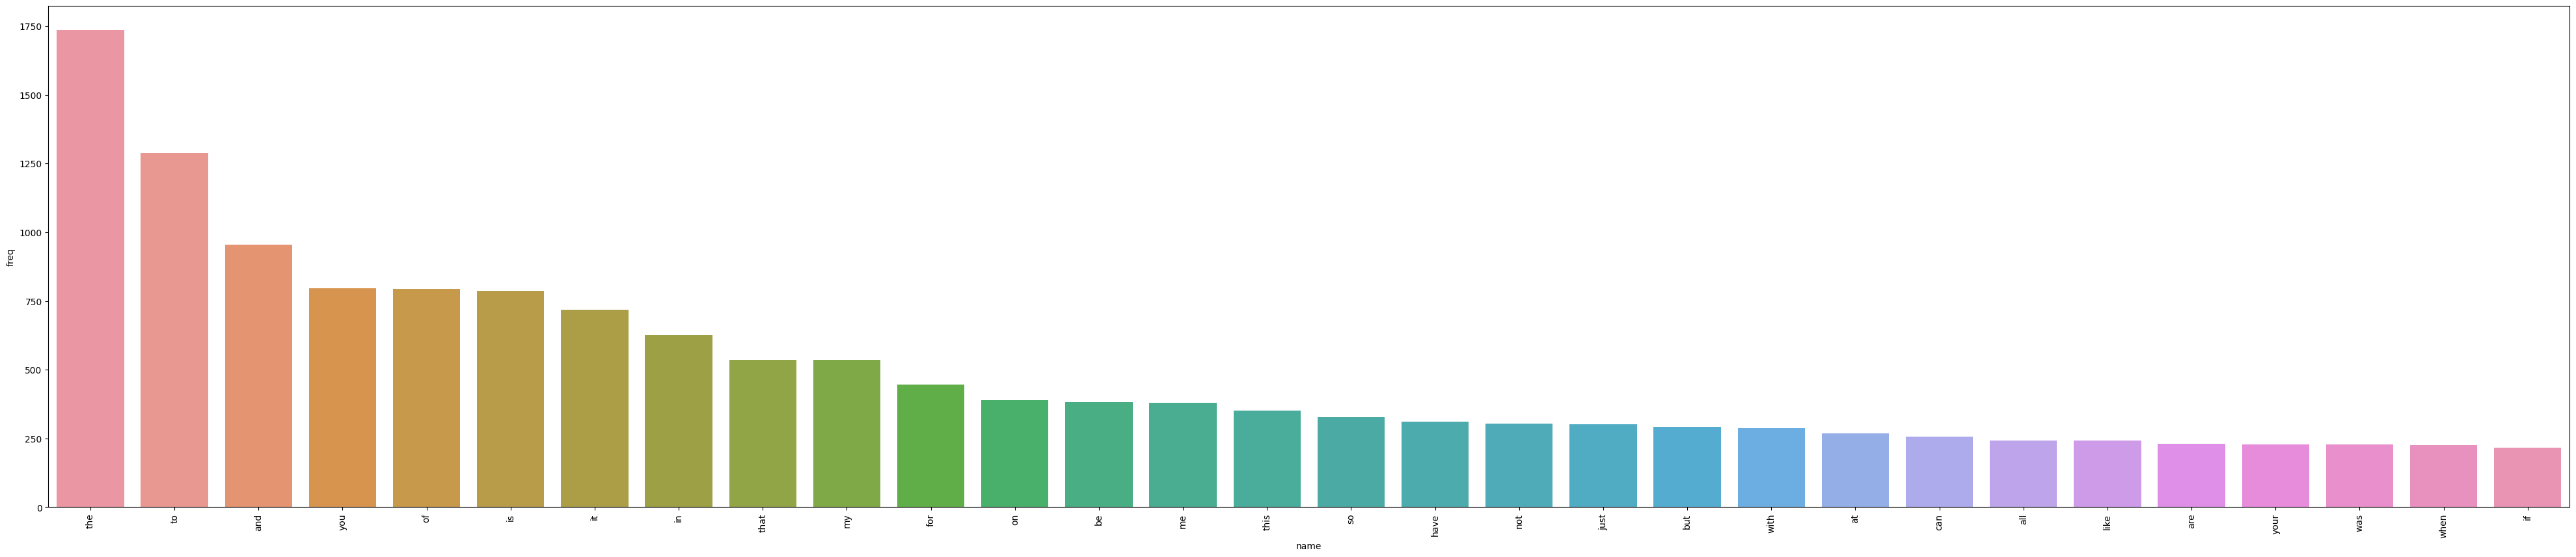

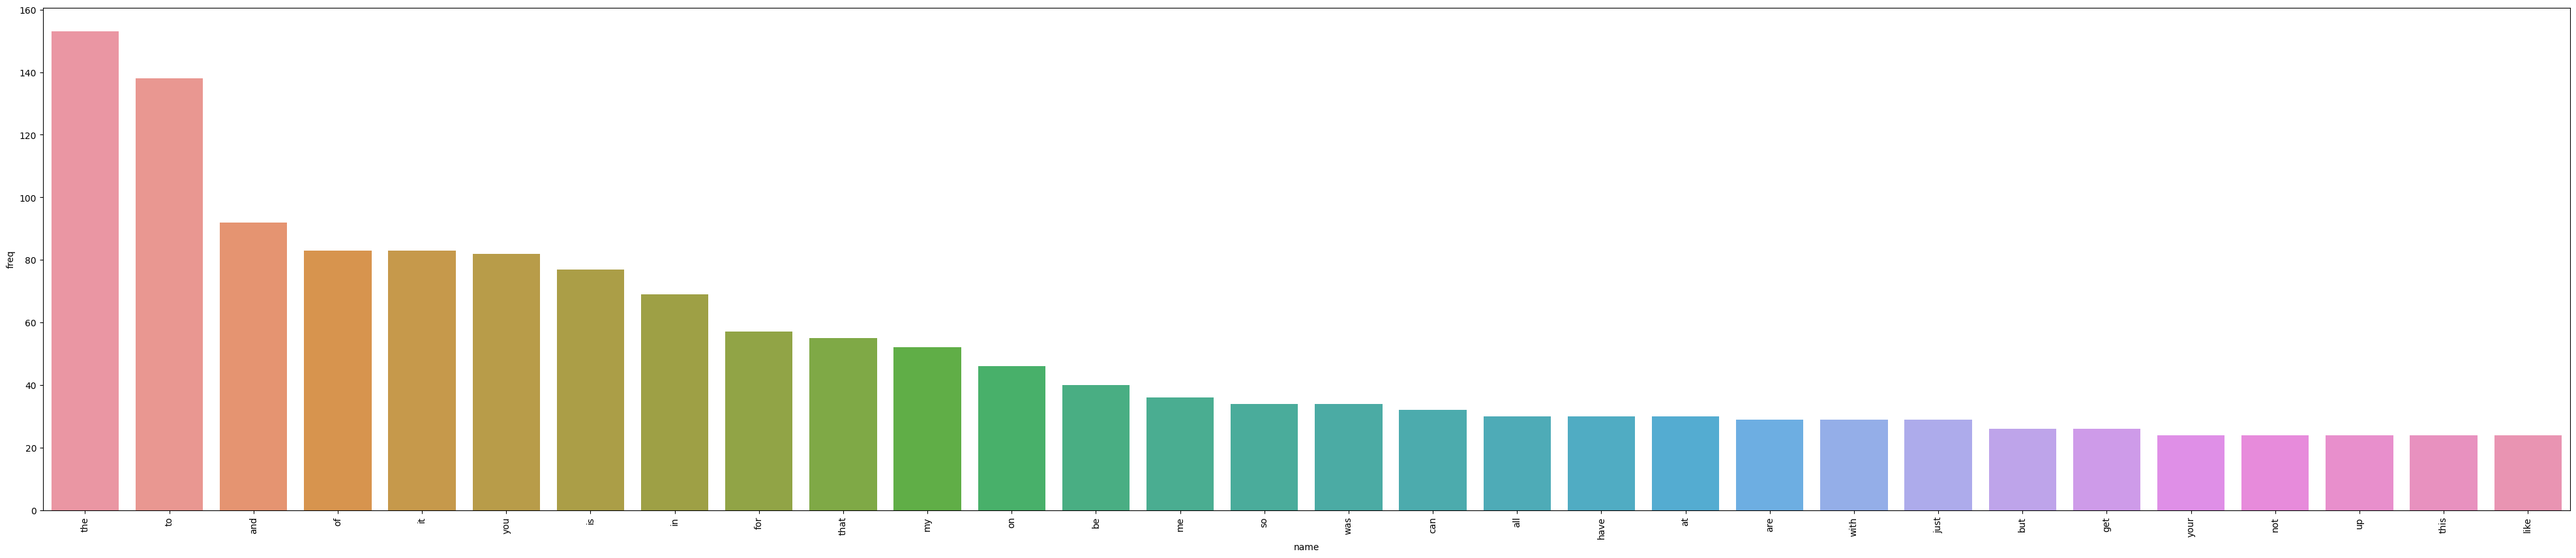

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(50, 10))
g = sns.barplot(x=sort_train['name'][:30],
                y=sort_train['freq'][:30])
g.set_xticklabels(sort_train['name'][:30], rotation = 90);

plt.subplots(figsize=(50, 10))
g = sns.barplot(x=sort_test['name'][:30],
                y=sort_test['freq'][:30])
g.set_xticklabels(sort_test['name'][:30], rotation = 90);

---
> ### **Exercise 2 (Take home):**  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [20]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF_vectorizer = TfidfVectorizer(max_features=1000)

TFIDF_vectorizer.fit(train_df['text'])
TFIDF_vectorizer.get_feature_names_out()[100:110]

array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

---
> ### **Exercise 3 (Take home):**  
Can you interpret the results above? What do they mean?

In [ ]:
# Answer here


The training accuracy(0.99) and testing accuracy(0.66) have a huge difference, meaning the model might be overfitting.

---
> ### **Exercise 4 (Take home):**  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)
BOW_500.fit(train_df['text'])

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [23]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
MNB_model = MultinomialNB()
MNB_model.fit(X_train, y_train)
y_train_pred = MNB_model.predict(X_train)
y_test_pred = MNB_model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.7


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


---
> ### **Exercise 5 (Take home):**  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [ ]:
# Answer here


The accuracy is more consistent in Naive Bayes model. If the Decision Tree model constructs rules that are too specific, it may hurt the accuracy in a different dataset; On the other hand, Naive Bayes model performs similarly as long as the distribution is roughly the same.

---
> ### **Exercise 6 (Take home):**  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [27]:
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")

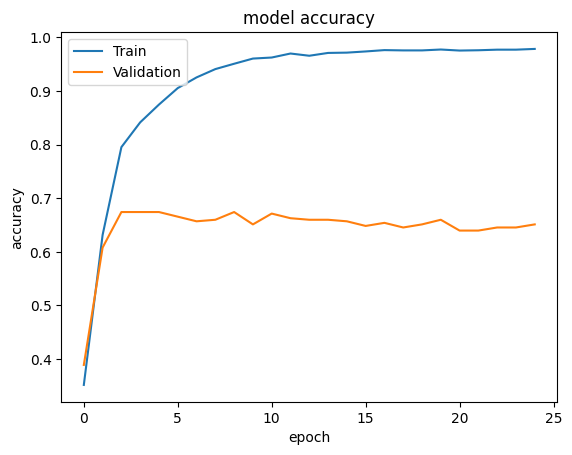

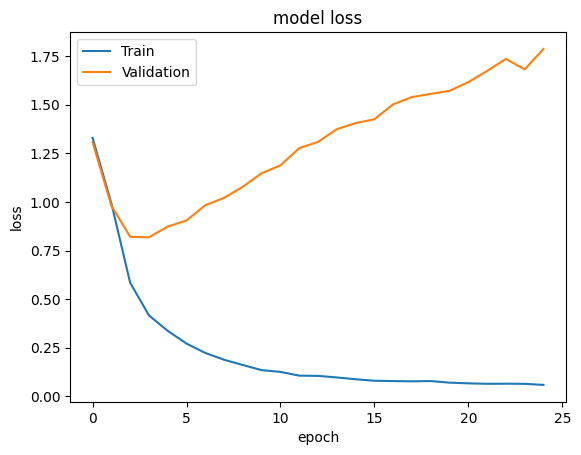

In [28]:
# Answer here

# Accuracy
plt.plot(training_log['accuracy'])
plt.plot(training_log['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Loss
plt.plot(training_log['loss'])
plt.plot(training_log['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

---
> ### **Exercise 7 (Take home):**  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [29]:
import gensim.downloader as api

glove_twitter_25_model = api.load("glove-twitter-25")

[==================================================] 100.0% 104.8/104.8MB downloaded


In [30]:
# Answer here
sentence = "Obama greets the press in Texas."
tokens = nltk.word_tokenize(sentence.lower())
vectors = glove_twitter_25_model[tokens]

In [31]:
# simply take the average of word vectors in the sentence.
sum = np.zeros(vectors.shape[1])
for vec in vectors:
    sum = sum + vec
sum = sum / vectors.shape[0]
display(sum)

array([-0.04768343,  0.18721485, -0.08448   , -0.33763128, -0.31017685,
       -0.46473571,  0.66450544, -0.07350028,  0.02352256,  0.03320499,
        0.30833254,  0.09971799, -4.00451429,  0.41526714,  0.24771715,
       -0.42157285, -0.11448836,  0.01443577, -0.32068857, -0.39591143,
       -0.12122428, -0.09958393, -0.07936685, -0.82415857, -0.07227143])

---
> ### **Exercise 8 (Take home):**  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [32]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

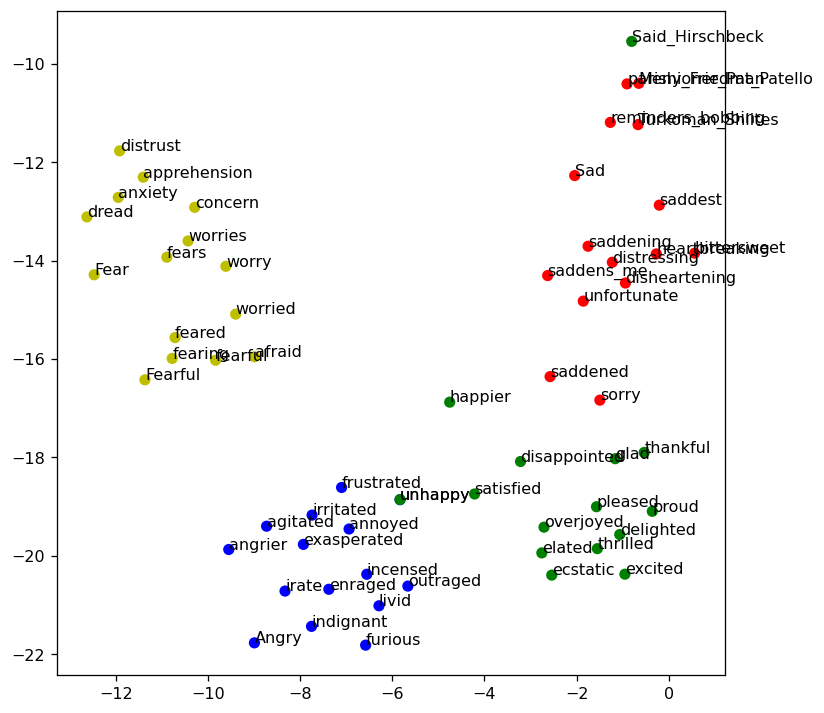

In [33]:
# Answer here
from sklearn.manifold import TSNE
model = w2v_google_model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

topn = 15
angry_words = [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]
target_words = angry_words + happy_words + sad_words + fear_words
color = ['b'] * topn + ['g'] * topn + ['r'] * topn + ['y'] * topn

size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
# **2. Second part**

In [26]:
import numpy as np
import pandas as pd

# Read in data
train = pd.read_csv("kaggle-data/train.csv", lineterminator='\n')
test = pd.read_csv("kaggle-data/test.csv", lineterminator='\n')

In [27]:
import torch

# Check GPU and set device
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla V100-SXM2-16GB


In [28]:
from sklearn import preprocessing

# Encode label into integer
le = preprocessing.LabelEncoder()
le.fit(train.emotion)
train['label'] = le.transform(train.emotion)

In [29]:
display(train)
display(test)

,tweet_id,text,emotion,label
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation,1
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness,5
2,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear,3
3,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy,4
4,0x2c91a8,Still waiting on those supplies Liscus. <LH>,anticipation,1
...,...,...,...,...
1455558,0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,joy,4
1455559,0x38959e,In every circumtance I'd like to be thankful t...,joy,4
1455560,0x2cbca6,there's currently two girls walking around the...,joy,4
1455561,0x24faed,"Ah, corporate life, where you can date <LH> us...",joy,4


,tweet_id,text
0,0x28b412,"Confident of your obedience, I write to you, k..."
1,0x2de201,"""Trust is not the same as faith. A friend is s..."
2,0x218443,When do you have enough ? When are you satisfi...
3,0x2939d5,"God woke you up, now chase the day #GodsPlan #..."
4,0x26289a,"In these tough times, who do YOU turn to as yo..."
...,...,...
411967,0x2913b4,"""For this is the message that ye heard from th..."
411968,0x2a980e,"""There is a lad here, which hath five barley l..."
411969,0x316b80,When you buy the last 2 tickets remaining for ...
411970,0x29d0cb,I swear all this hard work gone pay off one da...


In [30]:
from sklearn.model_selection import train_test_split

# X = train.text
# y = train.label

X_train, X_val, y_train, y_val = train_test_split(train.text,
                                                  train.label,
                                                  test_size=0.1,
                                                  random_state=42)



---

### Here I tried to add new tokens for BERT to fine-tuning, but I ran into some trouble updating weights, so it's simply replacing symbols.

### The rest of codes are just for fine-tuning BERT.

---


In [31]:
import re

def text_preprocessing(text):
    """
    - Replace symbols with special tokens
    @param    text (str): a string to be processed.
    @return   text (str): the processed string.
    """
    # Replace '@' with '[AT]'
    text = re.sub(r'@', '[AT]', text)

    # Replace '#' with '[HASH]'
    text = re.sub(r'#', '[HASH]', text)

    # Replace '<LH>' with '[UNK]'
    text = re.sub(r'<LH>', '[UNK]', text)

    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [32]:
print(train.iloc[3]['text'])
print(text_preprocessing(train.iloc[3]['text']))

@RISKshow @TheKevinAllison Thx for the BEST TIME tonight. What stories! Heartbreakingly <LH> #authentic #LaughOutLoud good!!
[AT]RISKshow [AT]TheKevinAllison Thx for the BEST TIME tonight. What stories! Heartbreakingly [UNK] [HASH]authentic [HASH]LaughOutLoud good!!


In [34]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Specify `MAX_LEN`
MAX_LEN = 64

# Create a function to tokenize a set of texts
def preprocessing_for_bert(data):
    """Perform required preprocessing steps for pretrained BERT.
    @param    data (np.array): Array of texts to be processed.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
    """
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []

    # For every sentence...
    for sent in data:
        # `encode_plus` will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = tokenizer.encode_plus(
            text=text_preprocessing(sent),  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            truncation=True,
            max_length=MAX_LEN,             # Max length to truncate/pad
            padding='max_length',           # Pad sentence to max length
            #return_tensors='pt',           # Return PyTorch tensor
            return_attention_mask=True      # Return attention mask
            )

        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

In [35]:
# Print sentence 3 and its encoded token ids
token_ids = list(preprocessing_for_bert([train.text[3]])[0].squeeze().numpy())
print('Original: ', train.text[3])
print('Token IDs: ', token_ids)

Original:  @RISKshow @TheKevinAllison Thx for the BEST TIME tonight. What stories! Heartbreakingly <LH> #authentic #LaughOutLoud good!!
Token IDs:  [101, 1031, 2012, 1033, 10831, 14406, 1031, 2012, 1033, 1996, 3489, 17948, 21711, 2239, 16215, 2595, 2005, 1996, 2190, 2051, 3892, 1012, 2054, 3441, 999, 27724, 15787, 100, 1031, 23325, 1033, 14469, 1031, 23325, 1033, 4756, 5833, 23743, 2094, 2204, 999, 999, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [36]:
# Run function `preprocessing_for_bert` on the data sets
print('Tokenizing data...')
train_inputs, train_masks = preprocessing_for_bert(X_train)
val_inputs, val_masks = preprocessing_for_bert(X_val)
test_inputs, test_masks = preprocessing_for_bert(test.text)

Tokenizing data...


In [37]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Convert other data types to torch.Tensor
train_labels = torch.tensor(y_train.tolist())
val_labels = torch.tensor(y_val.tolist())

# For fine-tuning BERT, the authors recommend a batch size of 16 or 32.
batch_size = 32

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

# Create the DataLoader for our test set
test_dataset = TensorDataset(test_inputs, test_masks)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=batch_size)

In [38]:
import torch
import torch.nn as nn
from transformers import BertModel

# Create the BertClassfier class
class BertClassifier(nn.Module):
    """Bert Model for Classification Tasks.
    """
    def __init__(self, freeze_bert=False):
        """
        @param    bert: a BertModel object
        @param    classifier: a torch.nn.Module classifier
        @param    freeze_bert (bool): Set `False` to fine-tune the BERT model
        """
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 50, 8 # 8 emotions

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(H, D_out)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)

        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

In [39]:
from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_model(epochs=4):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = BertClassifier(freeze_bert=False)

    # Tell PyTorch to run the model on GPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [40]:
import random
import time

# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
        """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the BertClassifier model.
        """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)
        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()
        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0
        # Put the model into the training mode
        model.train()
        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)
            # Zero out any previously calculated gradients
            model.zero_grad()
            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)
            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()
            # Perform a backward pass to calculate gradients
            loss.backward()
            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()
            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch
                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")
        # Reset batch tracking variables
        batch_loss, batch_counts = 0, 0
        t0_batch = time.time()
        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)
        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)
        # Print performance over the entire training data
        time_elapsed = time.time() - t0_epoch
        print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
        print("-"*70)
        print("\n")
        print("Training complete!")

def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
        on our validation set.
        """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()
    # Tracking variables
    val_accuracy = []
    val_loss = []
    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)
        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())
        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()
        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)
    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)
    return val_loss, val_accuracy

In [ ]:
set_seed(42)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=2)
train(bert_classifier, train_dataloader, val_dataloader, epochs=2, evaluation=True)

In [ ]:
import torch.nn.functional as F
def bert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
        on the test set.
        """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()
    all_logits = []
    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]
        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)
    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()
    return probs

In [ ]:
probs = bert_predict(bert_classifier, test_dataloader)
preds = np.argmax(probs, axis=1)

In [ ]:
test['pred_label'] = le.inverse_transform(preds)
test.to_csv("out.csv", columns=['tweet_id', 'pred_label'], index=False)

In [ ]:
test